In [84]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold,cross_val_predict,GridSearchCV
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,GradientBoostingClassifier, ExtraTreesClassifier
from sklearn.preprocessing import StandardScaler,OrdinalEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline,make_pipeline
from sklearn.metrics import accuracy_score, plot_confusion_matrix
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
import time
# Load data
data = pd.read_csv('heart_attack\heart.csv')

# remove duplicates
data = data.drop_duplicates()





In [85]:
X = data.drop(['output'],axis=1)
y = data['output']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=0)



In [86]:
data.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [87]:
# Preprocessor
num_var = ['age', 'trtbps', 'chol', 'thalachh', 'oldpeak']
cat_var = ['sex','cp','fbs','restecg','exng','slp','caa','thall']

# cat_prep = Pipeline(steps=[('ordinal', OrdinalEncoder(), cat_var)])

# num_prep = Pipeline(steps=[('scaler', StandardScaler(), num_var)])


tree_prep = ColumnTransformer(transformers=[('ordinal', OrdinalEncoder(), cat_var), ('scaler', StandardScaler(), num_var)], remainder='drop')



In [88]:
classifiers = {'Random Forest': RandomForestClassifier(n_estimators=100),
                'AdaBoost': AdaBoostClassifier(n_estimators=50),
                'Gradient Boost': GradientBoostingClassifier(n_estimators=100),
                'Extratree': ExtraTreesClassifier(n_estimators=100),
                'Svc':SVC(C=1),
                'Logis_Regres':LogisticRegression()}

classifiers = {name: make_pipeline(tree_prep,model) for name, model in classifiers.items()}

In [89]:
results = pd.DataFrame({'Model': [], 'Accuracy': [], 'Bal Acc.': [], 'Time': []})
for model_name, model in classifiers.items():
    start_time = time.time()
    model.fit(X_train,y_train)
    predictions = model.predict(X_test)
    total_time = time.time()- start_time
    results = results.append({'Model': model_name,
                            'Accuracy': metrics.accuracy_score(y_test, predictions)*100,
                            'Bal Acc.': metrics.balanced_accuracy_score(y_test,predictions)*100,
                            'Time': total_time},
                            ignore_index=True)

results_ord = results.sort_values(by=['Accuracy'], ascending=False, ignore_index=True)
results_ord.index += 1 
results_ord.style.bar(subset=['Accuracy', 'Bal Acc.'], vmin=0, vmax=100, color='#5fba7d')                            

C:\Users\asus\AppData\Local\Temp\ipykernel_14532\2518221516.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append({'Model': model_name,
C:\Users\asus\AppData\Local\Temp\ipykernel_14532\2518221516.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append({'Model': model_name,
C:\Users\asus\AppData\Local\Temp\ipykernel_14532\2518221516.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append({'Model': model_name,
C:\Users\asus\AppData\Local\Temp\ipykernel_14532\2518221516.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append({'Model': model_name,
C:\Users

,Model,Accuracy,Bal Acc.,Time
1,AdaBoost,91.803279,91.884532,0.075789
2,Extratree,88.524590,88.562092,0.110696
3,Svc,88.524590,87.799564,0.016955
4,Logis_Regres,86.885246,86.328976,0.017977
5,Random Forest,85.245902,85.239651,0.162593
6,Gradient Boost,81.967213,81.917211,0.075829


In [90]:
ada_boost = AdaBoostClassifier()
parameters = ({'n_estimators':[30,50,100,200,300],'learning_rate':[1,2,3,6,7,9], 'algorithm':['SAMME','SAMME.R']})
grd = GridSearchCV(estimator= ada_boost,param_grid=parameters, n_jobs=-1, scoring='accuracy')


In [91]:
grd_train=grd.fit(X_train,y_train)

C:\Users\asus\anaconda3\envs\school\lib\site-packages\sklearn\model_selection\_search.py:922: UserWarning: One or more of the test scores are non-finite: [0.82185374 0.80535714 0.80952381 0.80119048 0.78443878 0.60153061
 0.55153061 0.55153061 0.60153061 0.60153061        nan        nan
        nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan        nan        nan
 0.80544218 0.75969388 0.77219388 0.75544218 0.75561224 0.50527211
 0.50527211 0.50527211 0.50527211 0.50527211 0.30263605 0.30263605
 0.30263605 0.30263605 0.30263605 0.30263605 0.30263605 0.30263605
 0.30263605 0.30263605 0.30263605 0.30263605 0.30263605 0.30263605
 0.30263605 0.30263605 0.30263605 0.30263605 0.30263605 0.30263605]
  warnings.warn(


In [93]:
grd.best_params_

{'algorithm': 'SAMME', 'learning_rate': 1, 'n_estimators': 30}

In [98]:
ada_boost = AdaBoostClassifier(n_estimators=50, algorithm='SAMME.R', learning_rate=1)
ada_boost.fit(X_train,y_train)
predicts = ada_boost.predict(X_test)
scores = (predicts==y_test).sum()/len(y_test)
scores

0.9180327868852459

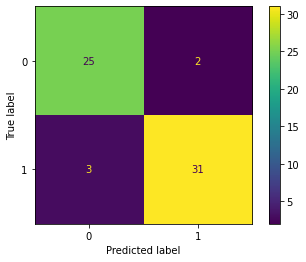

In [99]:
plot_confusion_matrix(ada_boost, X_test, y_test)
plt.show()

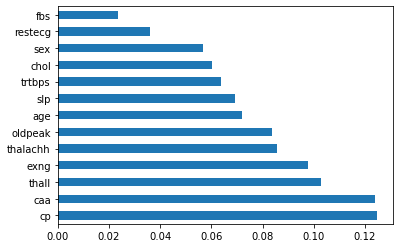

In [100]:
extra_tree = ExtraTreesClassifier()
extra_tree.fit(X,y)
feat_importan = pd.Series(extra_tree.feature_importances_, index= X.columns)
feat_importan.nlargest(13).plot(kind = 'barh')
plt.show()

accuracy_score: 0.89


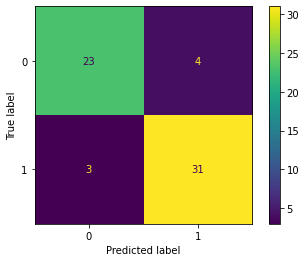

In [92]:
# Model
rf = RandomForestClassifier(random_state=0, max_depth=4, n_estimators=200)

# Model pipeline
rf_pipe = Pipeline([('prep', tree_prep), ('rf', rf)])

# Fit
rf_pipe_fitted = rf_pipe.fit(X_train, y_train)

# Performance (initial score is 0.89)
pred = rf_pipe_fitted.predict(X_test)

print(f'accuracy_score: {round(accuracy_score(y_test, pred), 2) }')

# Confusion matrix
plot_confusion_matrix(rf_pipe, X_test, y_test)
plt.show()